In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_drivers = pd.read_csv('driver_ids.csv', parse_dates=['driver_onboard_date'])
df_rides = pd.read_csv('ride_ids.csv')
df_rtsp = pd.read_csv('ride_timestamps_pvt.csv', parse_dates=['accepted_at', 'arrived_at', 'dropped_off_at', 'picked_up_at', 'requested_at'])
df_r = pd.read_csv('rides_revenue.csv', parse_dates=['driver_onboard_date', 'dropped_off_at'])

In [3]:
# Rank the rides per driver
df_r['driver_ride_num'] = df_r.groupby('driver_id')['dropped_off_at'].rank(ascending=True)

In [4]:
results_list = []
for i in range(1, 901):
    c1 = df_r['driver_ride_num'] >= i
    c2 = df_r['driver_onboard_date'] <= '2016-04-09'
    num_drivers_who_did_n_ride = df_r[c1 & c2]['driver_id'].nunique()
    
    results_list.append([i, num_drivers_who_did_n_ride])
#     if i % 50 == 0:
#         print (i)

In [5]:
pd.DataFrame(results_list, columns=['Rides', 'Num_drivers']).to_clipboard()

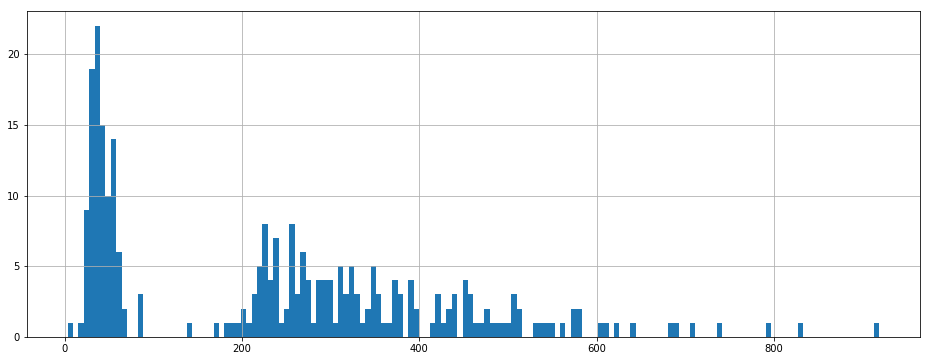

In [6]:
df_r[df_r['driver_onboard_date'] <= '2016-04-09'].groupby(['driver_id'])['driver_ride_num'].max().hist(bins=150, figsize=(16,6))